In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data_set = pd.read_csv('../HealthData/data/unclean_smartwatch_health_data.csv')

data_set

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


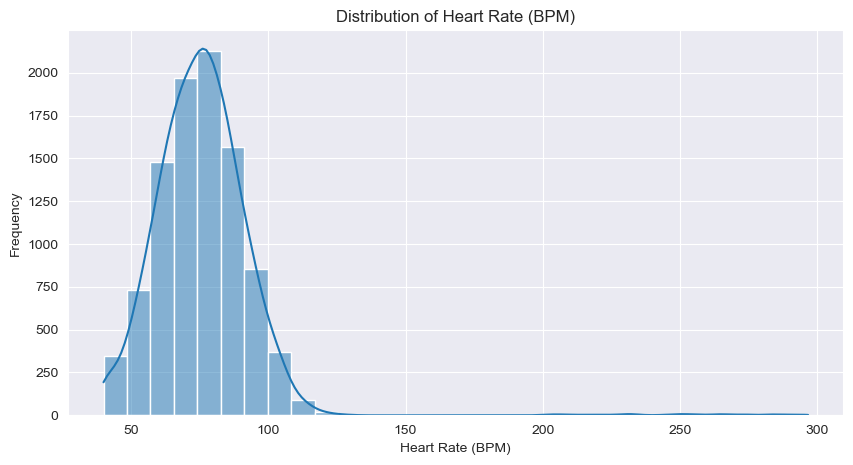

In [2]:
plt.figure(figsize=(10, 5))
sns.histplot(data_set["Heart Rate (BPM)"].dropna(), bins=30, kde=True)
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Rate (BPM)")
plt.show()

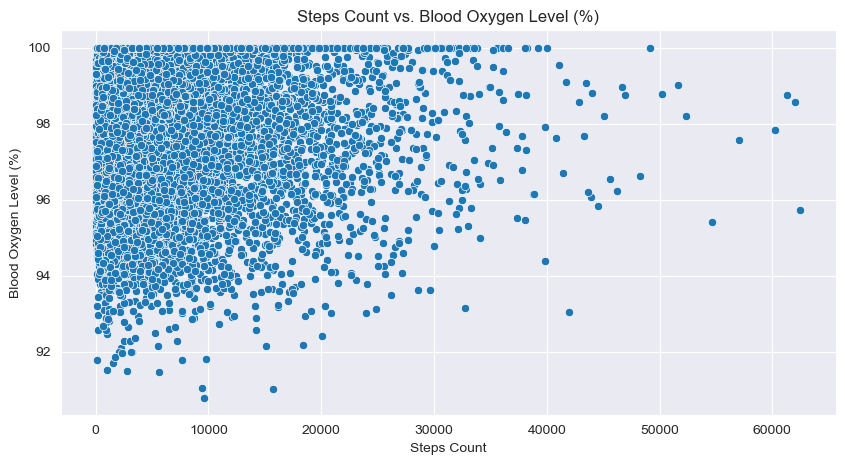

In [3]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Step Count", y="Blood Oxygen Level (%)", data=data_set)
plt.xlabel("Steps Count")
plt.ylabel("Blood Oxygen Level (%)")
plt.title("Steps Count vs. Blood Oxygen Level (%)")
plt.show()

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [5]:
data_set.drop(['User ID'], axis=1, inplace=True)

In [6]:
data_set['Heart Rate (BPM)'].value_counts()

Heart Rate (BPM)
40.000000     84
58.939776      1
81.802965      1
88.464233      1
80.644999      1
              ..
60.930143      1
81.640821      1
72.282686      1
101.596170     1
70.063864      1
Name: count, Length: 9517, dtype: int64

In [7]:
data_set['Heart Rate (BPM)'] = data_set.groupby('Activity Level')['Heart Rate (BPM)'].transform(lambda x: x.fillna(x.mean()))

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart Rate (BPM)        9800 non-null   float64
 1   Blood Oxygen Level (%)  9700 non-null   float64
 2   Step Count              9900 non-null   float64
 3   Sleep Duration (hours)  9850 non-null   object 
 4   Activity Level          9800 non-null   object 
 5   Stress Level            9800 non-null   object 
dtypes: float64(3), object(3)
memory usage: 468.9+ KB


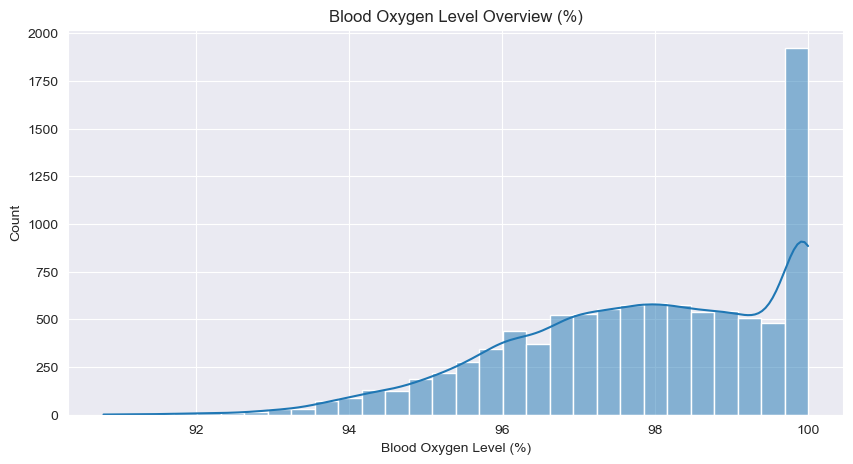

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data_set['Blood Oxygen Level (%)'].dropna(), bins=30, kde=True)
plt.title("Blood Oxygen Level Overview (%)")
plt.xlabel("Blood Oxygen Level (%)")
plt.show()


In [10]:
data_set['Blood Oxygen Level (%)'] = data_set['Blood Oxygen Level (%)'].fillna(data_set['Blood Oxygen Level (%)'].mean()).astype(float)

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart Rate (BPM)        9800 non-null   float64
 1   Blood Oxygen Level (%)  10000 non-null  float64
 2   Step Count              9900 non-null   float64
 3   Sleep Duration (hours)  9850 non-null   object 
 4   Activity Level          9800 non-null   object 
 5   Stress Level            9800 non-null   object 
dtypes: float64(3), object(3)
memory usage: 468.9+ KB


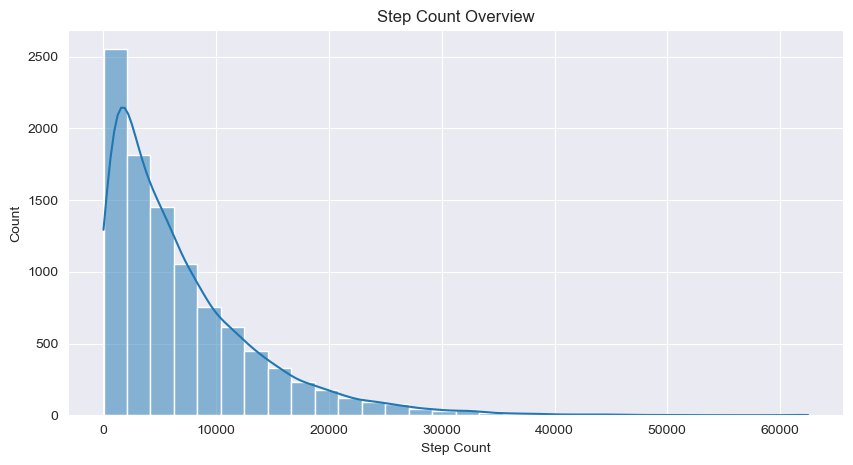

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data_set['Step Count'].dropna(), bins=30, kde=True)
plt.title("Step Count Overview")
plt.xlabel("Step Count")
plt.show()

In [13]:
data_set['Step Count'] = data_set.groupby('Activity Level')['Step Count'].transform(lambda x: x.fillna(x.median())).astype(float)

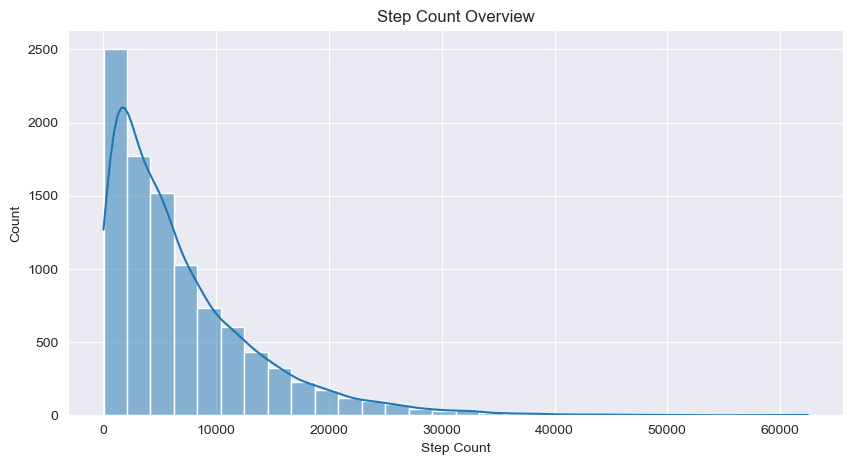

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data_set['Step Count'].dropna(), bins=30, kde=True)
plt.title("Step Count Overview")
plt.xlabel("Step Count")
plt.show()

In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart Rate (BPM)        9800 non-null   float64
 1   Blood Oxygen Level (%)  10000 non-null  float64
 2   Step Count              9800 non-null   float64
 3   Sleep Duration (hours)  9850 non-null   object 
 4   Activity Level          9800 non-null   object 
 5   Stress Level            9800 non-null   object 
dtypes: float64(3), object(3)
memory usage: 468.9+ KB


In [16]:
df = data_set.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9459 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart Rate (BPM)        9459 non-null   float64
 1   Blood Oxygen Level (%)  9459 non-null   float64
 2   Step Count              9459 non-null   float64
 3   Sleep Duration (hours)  9459 non-null   object 
 4   Activity Level          9459 non-null   object 
 5   Stress Level            9459 non-null   object 
dtypes: float64(3), object(3)
memory usage: 517.3+ KB


In [18]:
df['Sleep Duration (hours)'].value_counts()

Sleep Duration (hours)
ERROR                243
7.167235622316564      1
5.853137033975933      1
2.660245681286116      1
4.174223872814821      1
                    ... 
8.068977291824663      1
6.898289469208437      1
8.13241677150912       1
4.816662682901267      1
5.691001039740254      1
Name: count, Length: 9217, dtype: int64

In [19]:
df.loc[:, 'Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')
df.loc[:, 'Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())

df['Sleep Duration (hours)'].value_counts()

C:\Users\tomas\AppData\Local\Temp\ipykernel_59200\768243695.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())


Sleep Duration (hours)
6.502597    243
7.167236      1
5.853137      1
2.660246      1
4.174224      1
           ... 
8.068977      1
6.898289      1
8.132417      1
4.816663      1
5.691001      1
Name: count, Length: 9217, dtype: int64

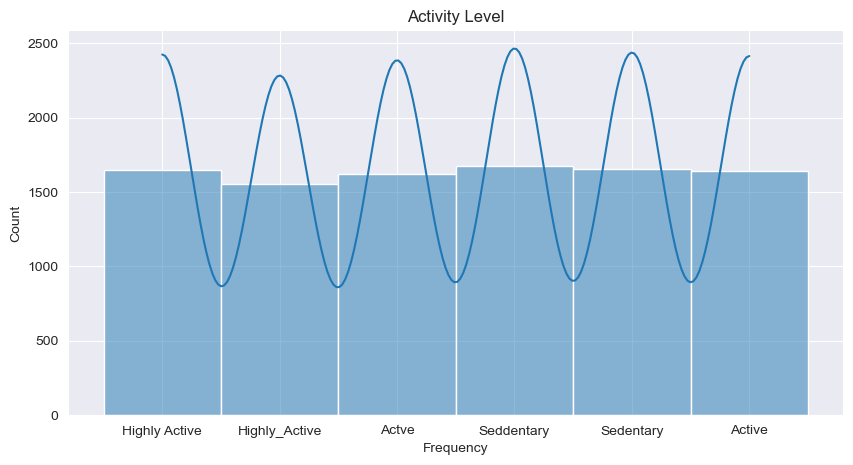

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data_set['Activity Level'].dropna(), bins=30, kde=True)
plt.title("Activity Level")
plt.xlabel("Frequency")
plt.show()

In [21]:
df['Stress Level'].value_counts()

Stress Level
6            971
2            966
7            966
3            961
1            953
9            946
4            933
10           920
5            912
8            883
Very High     48
Name: count, dtype: int64

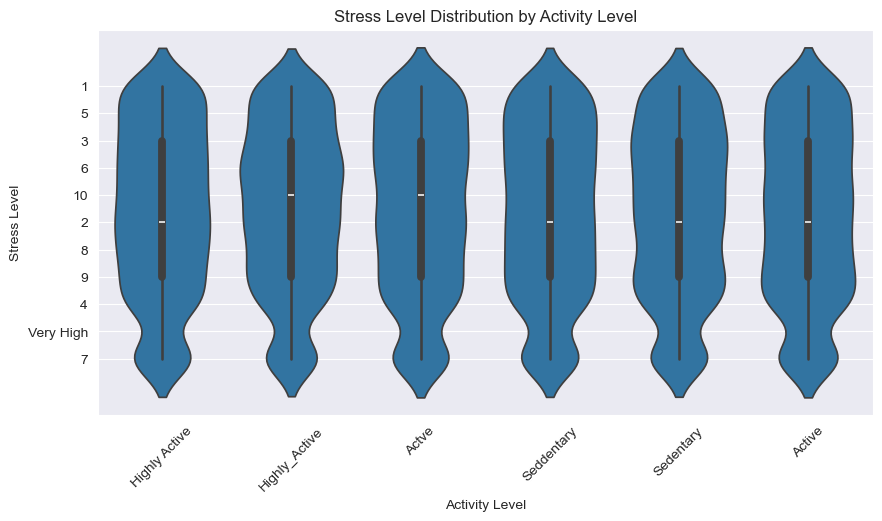

In [22]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Activity Level", y="Stress Level", data=data_set)
plt.xlabel("Activity Level")
plt.ylabel("Stress Level")
plt.title("Stress Level Distribution by Activity Level")
plt.xticks(rotation=45)
plt.show()


In [23]:
df['Activity Level'].value_counts()

Activity Level
Seddentary       1612
Highly Active    1595
Sedentary        1594
Active           1594
Actve            1558
Highly_Active    1506
Name: count, dtype: int64

In [24]:
actory_level_map = {
    'Sedentary': 0,
    'Seddentary': 0,
    'Active': 1,
    'Actve': 1,
    'Highly Active': 2,
    'Highly_Active': 2
}
df.loc[:, 'Activity Level'] = df['Activity Level'].map(actory_level_map).astype(float)

df['Activity Level'].value_counts()

Activity Level
0.0    3206
1.0    3152
2.0    3101
Name: count, dtype: int64

In [25]:
df['Sleep Duration (hours)'].unique()

array([7.167235622316564, 6.538239375570314, 6.5025974111444835, ...,
       6.91654920303435, 5.691233932149209, 5.691001039740254],
      dtype=object)

In [26]:
df = df[df['Stress Level'] != "Very High"]

df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].astype(str).astype(float)
df['Activity Level'] = df['Activity Level'].astype(str).astype(float)
df['Stress Level'] = df['Stress Level'].astype(str).astype(float)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9411 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart Rate (BPM)        9411 non-null   float64
 1   Blood Oxygen Level (%)  9411 non-null   float64
 2   Step Count              9411 non-null   float64
 3   Sleep Duration (hours)  9411 non-null   float64
 4   Activity Level          9411 non-null   float64
 5   Stress Level            9411 non-null   float64
dtypes: float64(6)
memory usage: 514.7 KB


Epoch 1/50
189/189 [==============================] - 1s 3ms/step - loss: 12.4734 - mae: 2.9210 - val_loss: 8.8521 - val_mae: 2.5601 - lr: 0.0010
Epoch 2/50
189/189 [==============================] - 0s 3ms/step - loss: 9.4803 - mae: 2.6180 - val_loss: 8.4088 - val_mae: 2.5103 - lr: 0.0010
Epoch 3/50
189/189 [==============================] - 0s 2ms/step - loss: 8.9937 - mae: 2.5752 - val_loss: 8.2948 - val_mae: 2.4972 - lr: 0.0010
Epoch 4/50
189/189 [==============================] - 0s 3ms/step - loss: 8.8539 - mae: 2.5476 - val_loss: 9.2760 - val_mae: 2.5977 - lr: 0.0010
Epoch 5/50
189/189 [==============================] - 0s 2ms/step - loss: 8.9067 - mae: 2.5645 - val_loss: 8.4503 - val_mae: 2.5007 - lr: 0.0010
Epoch 6/50
189/189 [==============================] - 0s 2ms/step - loss: 8.7490 - mae: 2.5424 - val_loss: 8.3781 - val_mae: 2.5095 - lr: 0.0010
Epoch 7/50
189/189 [==============================] - 0s 2ms/step - loss: 8.7105 - mae: 2.5380 - val_loss: 8.5266 - val_mae: 2.52

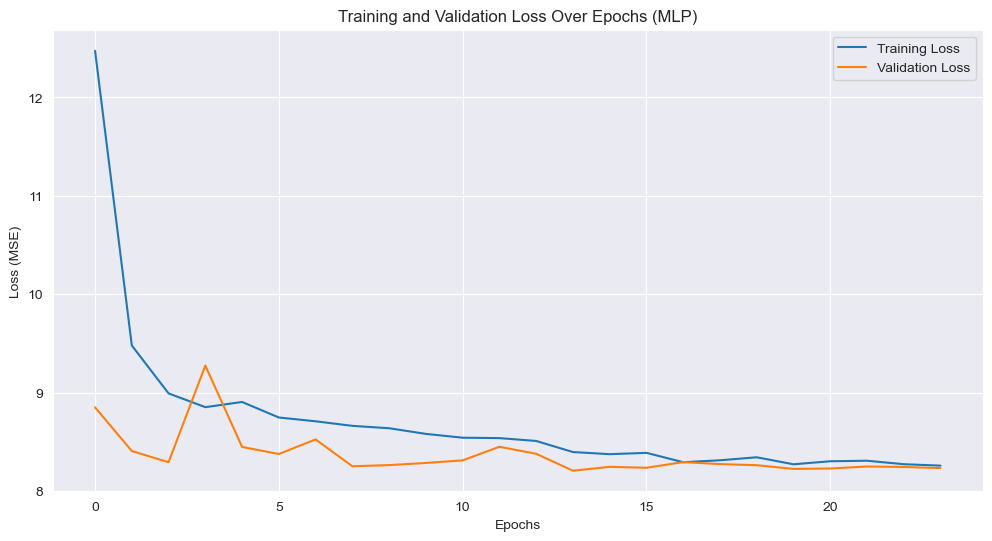

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

X = df.drop('Stress Level', axis=1).values
y = df['Stress Level'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cp = ModelCheckpoint('stress_level.keras', save_best_only=True, monitor='val_loss', mode='min')
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[cp, es, rlr]
)

y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss Over Epochs (MLP)')
plt.show()
